In [150]:
#Se importa el GaussianMixture desde Pyspark
from pyspark.ml.clustering import GaussianMixture
import pandas as pd
from pyspark.sql import SparkSession
from sklearn.preprocessing import StandardScaler
from plotnine import *

In [151]:
#Inicializamos nuestra sesión, paso necesario para el contexto
spark = SparkSession.builder.appName('GaussianMixtureML').getOrCreate()

In [152]:
#Leemos la data con pandas
data_pandas = pd.read_csv('https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt',
    sep='\t')
#data_pandas.head()
data_pandas

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,FatFREEMilk(8oz),NaN,90,0.0,9,0.0,0.0,0.0,5,125,13,0.0,12,0,0,1,0
118,1%LowFatChocolateMilk(8oz),NaN,160,25.0,8,2.5,1.5,0.0,15,150,26,1.0,25,0,0,1,0
119,VanillaMilkShake12fl oz,NaN,350,100.0,8,11.0,8.0,0.0,40,290,57,0.0,48,0,0,1,0
120,ChocolateMilkShake12fl oz,NaN,400,100.0,8,11.0,8.0,0.0,40,330,68,0.0,58,0,0,1,0


In [153]:
#Se convierte la data de Pandas a un Dataframe de Spark
from pyspark.sql import SQLContext
#Pasamos nuestra sesión al contexto
sqlContext = SQLContext(spark)
#Creamos el Dataframe con la Data obtenida anteriormente
data_spark = sqlContext.createDataFrame(data_pandas)
data_spark

C:\Users\criss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyspark\sql\context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.


DataFrame[Item: string, Serving.size: double, Calories: bigint, Fat.Cal: double, Protein(g): bigint, Fat(g): double, Sat.Fat(g): double, Trans.fat(g): double, Chol(mg): bigint, Sodium(mg): bigint, Carbs(g): bigint, Fiber(g): double, Sugar(g): bigint, Meat: bigint, Breakfast: bigint, Not Breakfast: bigint, CarbsxMeat: bigint]

In [154]:
#Se añade la columna features (Calories y Sodium(mg))
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler().setInputCols(['Calories','Sodium(mg)']).setOutputCol('features')
data_spark = assembler.transform(data_spark)
data_spark

DataFrame[Item: string, Serving.size: double, Calories: bigint, Fat.Cal: double, Protein(g): bigint, Fat(g): double, Sat.Fat(g): double, Trans.fat(g): double, Chol(mg): bigint, Sodium(mg): bigint, Carbs(g): bigint, Fiber(g): double, Sugar(g): bigint, Meat: bigint, Breakfast: bigint, Not Breakfast: bigint, CarbsxMeat: bigint, features: vector]

In [156]:
#Se inicializa el Gaussian
gmm = GaussianMixture().setK(2).setSeed(538009335)

In [157]:
#Aplicamos el modelo a la data
model = gmm.fit(data_spark)

In [158]:
#Imprimimos el Gaussian como DataFrame
model.gaussiansDF.show(truncate=False)

+--------------------------------------+----------------------------------------------------------------------------------+
|mean                                  |cov                                                                               |
+--------------------------------------+----------------------------------------------------------------------------------+
|[712.0610607705725,1469.192787055152] |53355.95043747357  27873.81870971215   \n27873.81870971215  179022.74433330467    |
|[361.89241094007997,727.7996760930844]|21045.78282040177   46698.500068180714  \n46698.500068180714  181934.26343735625  |
+--------------------------------------+----------------------------------------------------------------------------------+



C:\Users\criss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.


In [159]:
model

GaussianMixtureModel: uid=GaussianMixture_52cf2e4c5a92, k=2, numFeatures=2

In [160]:
features = ['Calories','Sodium(mg)']
x = data_pandas[features]
z = StandardScaler()
x[features] = z.fit_transform(x)

C:\Users\criss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


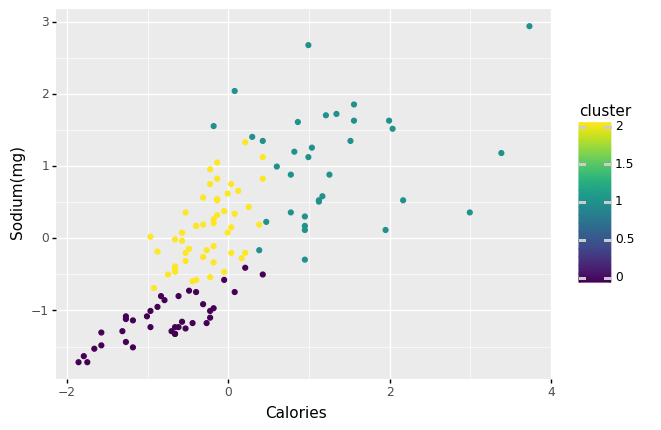

<ggplot: (80348454069)>

In [165]:
(ggplot(x,aes(x="Calories",y="Sodium(mg)",color="cluster"))+geom_point())